In [1]:
from reservoir_rls import *
import matplotlib.pyplot as plt
from lorenz63 import *
from scipy.signal import welch, periodogram

In [2]:
x = double_reservoir(3,300,input_weight = [.1,.2])

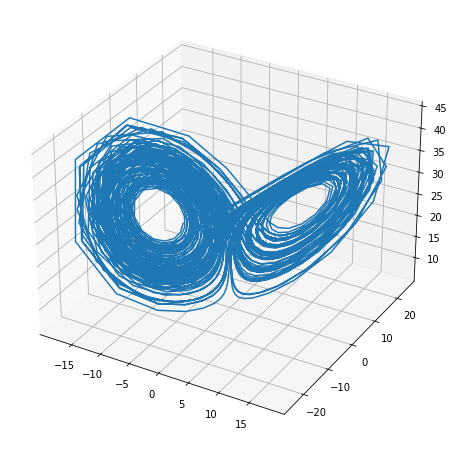

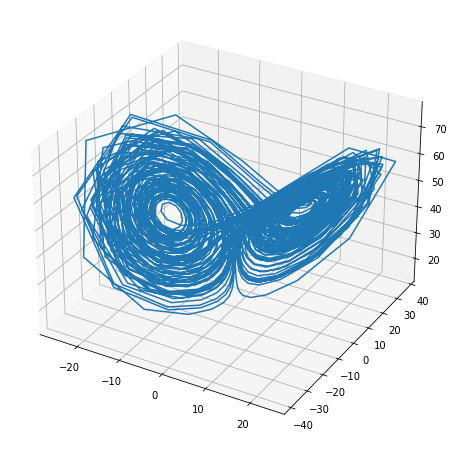

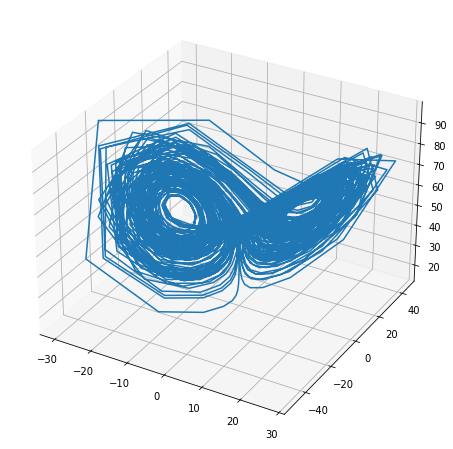

In [24]:
data_length = 10000
step = 0.05
f_s = 1/step
# scale = 0.02
rho = 28
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz(x, time, r_t, rho = rho)
lorenz_data = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data[:,0],lorenz_data[:,1],lorenz_data[:,2])
plt.show()

rho = 48
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz(x, time, r_t, rho = rho)
lorenz_data = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data[:,0],lorenz_data[:,1],lorenz_data[:,2])
plt.show()

rho = 60
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz(x, time, r_t, rho = rho)
lorenz_data = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data[:,0],lorenz_data[:,1],lorenz_data[:,2])
plt.show()

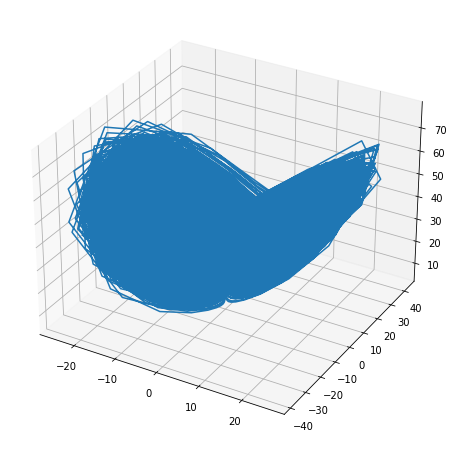

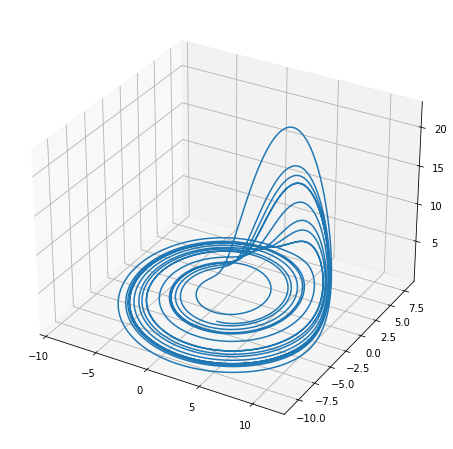

In [56]:
data_length = 500000
step = 0.05
f_s = 1/step
scale = 0.02
slow_var = 48/28
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz_rossler(x, time, r_t, scale = scale, slow_var = slow_var)
lorenz_data_rossler = getCoupledLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_rossler[:,0],lorenz_data_rossler[:,1],lorenz_data_rossler[:,2])
plt.show()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_rossler[:,3],lorenz_data_rossler[:,4],lorenz_data_rossler[:,5])
plt.show()

(250001,)
(250001,)
[0.0034]
[294.11764706]


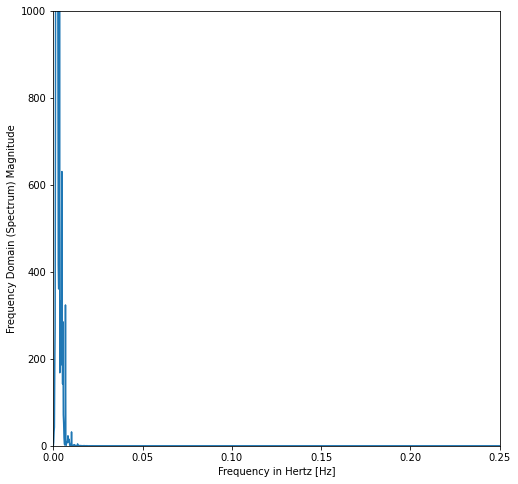

In [53]:
var = 4
nperseg = 100000

f_s = 1/step
freqs, X = periodogram(lorenz_data_rossler[:,var], f_s, scaling = 'density')
print(X.shape)
print(freqs.shape)
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, .25)
ax.set_ylim(0, 1000)

freqsr, Xr = periodogram(lorenz_data_rossler[:,4], f_s, scaling = 'density')
top_freq = freqsr[np.abs(Xr) == np.max(np.abs(Xr))]
print(top_freq)
print(1/top_freq)

In [ ]:
Wn_xy = 0.05
Wn_z = Wn_xy
lorenz_data_split = separate_lorenz_2scale(lorenz_data_rossler[:,:3], f_s, Wn_xy, Wn_z, filter_order = 10)
print(np.mean(lorenz_data_split, axis = 0))
print(np.std(lorenz_data_split, axis = 0))

In [35]:
data_length = 1000000
step = 0.05
scale = 0.01
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_rossler(x, time, r_t, scale = scale)
lorenz_data_base = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)

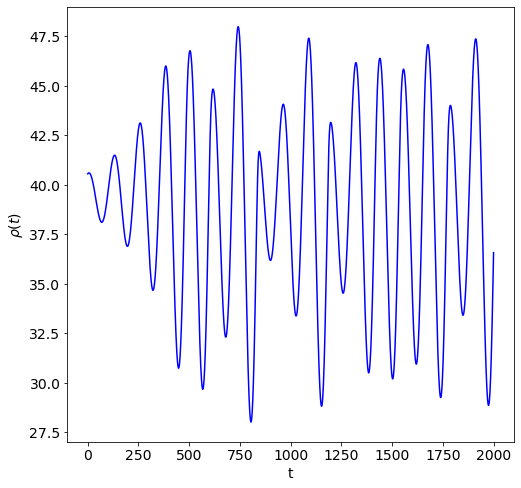

In [38]:
ymax = 7.84
ymin = -10.8
rho_scale = lambda y: 28 + 20*(y - ymin)/(ymax - ymin)
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (8,8))
plt.plot(np.arange(lorenz_data_base.shape[0])*0.01,rho_scale(lorenz_data_base[:,1]), 'b')
# plt.xticks([])
plt.xlabel('t')
plt.ylabel(r'$\rho(t)$')
plt.savefig('rossler_attractor_yr_scaled.png')
plt.show()

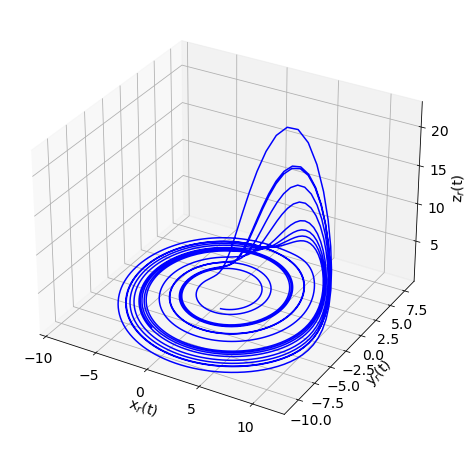

In [23]:
ymax = 7.84
ymin = -10.8
rho_scale = lambda y: 28 + 20*(y - ymin)/(ymax - ymin)
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(np.arange(lorenz_data_base.shape[0]),rho_scale(lorenz_data_base[:,1]), 'b')
ax.set_xlabel('x$_r$(t)')
ax.set_ylabel('y$_r$(t)')
ax.set_zlabel('z$_r$(t)')
plt.savefig('rossler_attractor_yr.png')
plt.show()

In [ ]:
print(np.mean(lorenz_data_base, axis = 0))
print(np.std(lorenz_data_base, axis = 0))

In [58]:
res_base = reservoir(3, 300, input_weight = -0.06, input_bias = 0.04, regularization = 1e-7, forget = 0.999)
train_length = 1000
sync_length = 500
pred_length = 500
num_tests = 100
results = cross_validation_performance_resync(lorenz_data_rossler[:,:3], res_base, num_tests, sync_length, train_length, pred_length, \
         seed = 10, errormax = 3.2, train_method = 'Normal', progress = True, plot = False)
print(results)
print(np.mean(results))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.22it/s]

[ 4.  9. 18.  4.  3. 18. 21.  4. 21. 18.  2. 57.  5. 14.  2. 27.  7. 11.
 11. 26. 94. 67.  9.  4. 51.  5.  3. 22. 25. 16. 56.  8. 47. 18.  7.  6.
  4. 19.  4. 47. 34.  3. 28.  7.  5. 21.  8.  6. 21.  5.  7. 65. 38.  1.
 10. 10. 43. 10.  4.  3.  3.  5. 45.  2.  3. 54. 91. 14.  8.  7. 16. 73.
 14. 37. 22.  2. 45. 12. 71. 80. 25.  4. 25. 43.  4.  3. 29.  9. 24.  2.
  5. 44.  2.  5. 20. 42. 31. 10.  3. 16.]
20.73


In [ ]:
d_res = double_reservoir(6, 400, input_weight = [0.017,0.017], regularization = [1e-10,1e-10], forget = [1,0.99])
train_length = 1000
sync_length = 500
pred_length = 500
num_tests = 50
data = np.append(lorenz_data_rossler[:,:3], lorenz_data_rossler[:,:3], axis = 1)
target_data = lorenz_data_split
results = cross_validation_performance_resync_decompose(data, target_data, d_res, num_tests, sync_length, train_length, pred_length, \
         seed = 5, errormax = 3.2, train_method = 'Normal', progress = True, plot = False)
print(results)
print(np.mean(results))